# Linear Regression using Scikit-Learn

In this example, we use:
- `scikit-learn` library to train a linear regression model
- `seaborn` and `matplotlib` libraries to visualize the data and the model
- California Housing dataset from `scikit-learn` library. 

In [1]:
import numpy as np
import pandas as pd

As we discussed in [ML Workflow](../ml_workflow.md), there are key steps before we are ready for modelling. Those steps are data engineering, EPA (Exploratory Data Analysis), and feature engineering. In this simple example, we touch on those steps breifly.



## Data Engineering

In this example, our training dataset is reading to use from the `sklearn.datasets` module.

### Load the data
In this example, the data engineering steps (collect, cleanse and preprocess the data) are already done for us. So, we simply use the California Housing dataset from `sklearn.datasets` module. This dataset has around 20,000 samples and 8 features.

In [2]:
# Using built-in dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset.
housing_data = fetch_california_housing(as_frame=True)

In [3]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Exploratory Data Analysis (EDA) and Feature Engineering

We will briefly [explore and visualize](../ml_workflow.md#visualization-techniques)   the data and their relationship. Also, we will briefly touch on common steps of _Feature Selection_, _Feature Creation_ and _Feature Scaling_. 

Let's start getting familiar with our data.  The goal of this step is to first understand our data, and then to engineer the features in a way that our dataset is ready for training a high performing model. 


### Shape and Types of data

Let's start with the type and shapes of our dataset.

In [4]:
# X is the input features.
X = housing_data.data

# y is the target/label
y = housing_data.target

print(f"X type: {type(X)}, X shape: {X.shape}")
print(f"y type: {type(y)}, y shape: {y.shape}")

X type: <class 'pandas.core.frame.DataFrame'>, X shape: (20640, 8)
y type: <class 'pandas.core.series.Series'>, y shape: (20640,)


`X` is a matrix of `m` samples and `n` features. Here `m = 20640` and `n = 8`. So, we have 8 features and total of 20640 samples.

`y` is a vector of `m` samples. So, since here we are doing a _superivsed learning_ task, we should have target values for each of the samples. So, `y` is a vector of 20640 values.

In [5]:
print("X values:")
print(X.head())

print("\ny values in $100,000:")
print(y.head())

X values:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

y values in $100,000:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


We can inspect each of the examples individually by using `pandas` features.

In [6]:
# The first row of X and its target y values:
print("\nFirst row of X and it's target value y:")
print("X_1:")
print(X.iloc[0])
print("y_1:")
print(y[0])


First row of X and it's target value y:
X_1:
MedInc          8.325200
HouseAge       41.000000
AveRooms        6.984127
AveBedrms       1.023810
Population    322.000000
AveOccup        2.555556
Latitude       37.880000
Longitude    -122.230000
Name: 0, dtype: float64
y_1:
4.526


### Detecting Outliers
Now let's explore our data to check for any outliers. Detecting outliers is important as they can have a disproportionate effect on the model and lean to poor performance.


In [7]:
# Range of each feature
print(X.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In the above, we already can see some outliers. For example, the `AveRooms` feature has some very high values e.g. 141 which is probably an outlier for a typical housing dataset. Or the number of occupants per household `AveOccup` has some very high values e.g. 1243. Those are probably outliers.

However before we decide to remove them, let's visualize the data and see if we can get more insights. We'll use `seaborn` and `matplotlib` libraries for visualization. 

> Note: EDA and Feature Engineering is a process that needs to be done carefully and iteratively. This process needs a lot of domain knowledge and experience. For example, a valid but rare case might be considered as an outlier, etc.  


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

**Box Plot**  
A box plot is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.



In the following we plot the box plot for one of the features `AveRooms`. Depending on the domain and the data, we can decide which features to start with for the clean up process. 

<Axes: ylabel='AveRooms'>

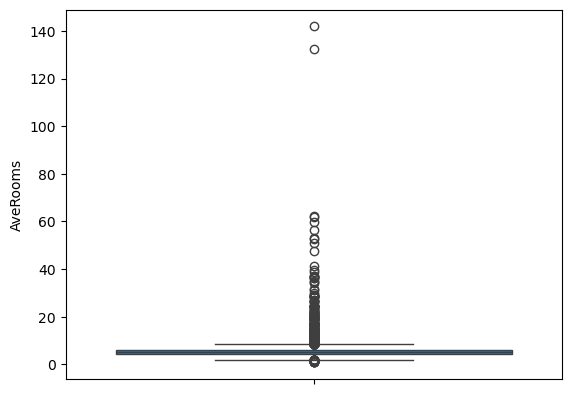

In [9]:
sns.boxplot(data=X["AveRooms"])

In the boxplot:
- **Top Line (Upper Whisker)**: The top line represents the Q3, which the value below which 75% of the data falls.
- **Middle Line**: The middle box also called **Interquartile Range (IQR)** which represents the median, which is the middle value of the dataset. $IQR = Q3 - Q1$
- **Bottom Line (Lower Whisker)**: The bottom line represents the Q1, which the value below which 25% of the data falls. 

**Beyond the Whiskers**: The small circles are the indicator of potential outliers, as they fall beyond the acceptable range of typical data variability.


#### Clean up the outliers
We can start by determining the range of acceptable values using the **IQR (Interquartile Range)** method, which is standard for identifying outliers. However, we can apply a **softer approach** by increasing the threshold multiplier (e.g., $k = 2.5$ instead of the usual $1.5$) to only exclude extreme outliers. 


1. **Compute IQR:**
   - Calculate $Q1$ (25th percentile) and $Q3$ (75th percentile) of `AveRooms`.
   - Compute the IQR: $ \text{IQR} = Q3 - Q1 $.
   - Define thresholds:
    $$ \text{Lower Bound} = Q1 - k \times \text{IQR} $$
    $$ \text{Upper Bound} = Q3 + k \times \text{IQR} $$
     We'll start with a **softer multiplier** like $k = 2.5$.


In [10]:
# Step 1: Compute Q1, Q3, and IQR
Q1 = X["AveRooms"].quantile(0.25)
Q3 = X["AveRooms"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds (using a softer threshold with k = 2.5)
k = 2.5
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

Q1: 4.440716235896959, Q3: 6.052380952380952, IQR: 1.6116647164839932
Lower bound: 0.4115544446869759
Upper bound: 10.081542743590935



2. **Filter Out Outliers:**
   - Remove rows where the `AveRooms` value is outside the bounds.


In [11]:
# Step 2: Filter the dataset based on the bounds
cleaned_X = X[
    (X["AveRooms"] >= lower_bound) & (X["AveRooms"] <= upper_bound)
].copy()

# Filter the target variable based on the filtered features
cleaned_y = y[cleaned_X.index].copy()

print(f"Original dataset size: X={X.shape[0]}, y={y.shape[0]}")
print(f"Cleaned dataset size: X={cleaned_X.shape[0]}, y={cleaned_y.shape[0]}")

Original dataset size: X=20640, y=20640
Cleaned dataset size: X=20419, y=20419


The cleaned up removed a small fraction of the data, which is a good sign that the data is not too noisy, and we probably removed the outliers, not the valid data.

3. **Validate:**
   - Visualize the boxplot again to ensure the outliers are handled properly.

<Axes: ylabel='AveRooms'>

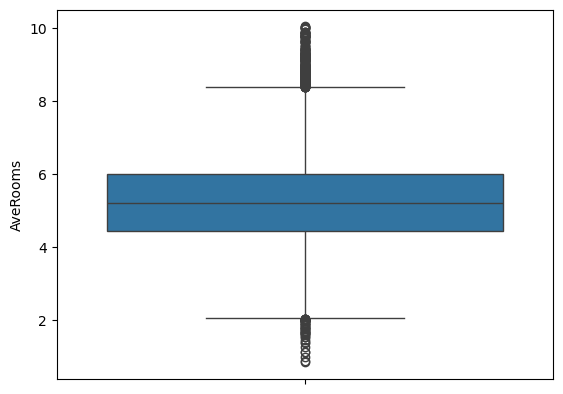

In [12]:
sns.boxplot(data=cleaned_X["AveRooms"])

Alright, this is a better plot now. We can see the obvious outliers are removed. You can continue this by adjusting the threshold of $k$ to lower or higher values and see how it affects the data.

We can repeat the same process for other features as well and clean up the outliers. Although, we may decide to have a light clean up first, then go through the next steps which help us decide about the feature selection. Then after knowing the chosen features, we can come back to this step and do a more thorough clean up.

> Note: EDA and Feature Engineering (similar to the whole ML process) is an **empirical process** and needs to be done **iteratively**. We may need to come back to this step after the feature selection and engineering steps. 

### Correlation Heatmap

This is a useful way to visualize the relationship between features (and features-target) which can help us in feature selection. This view in particular is useful to detect multicollinearity (when two or more features are highly correlated, i.e move of one, impact the other).

**Correlation**    
 means that those two features are moving together. Correlation values range from -1 to 1. For example:
- Positive correlation is when one feature increases, the other feature also increases.
- Negative correlation is when one feature increases, the other feature decreases.

As this influence from a feature to another increases, the correlation value moves towards 1 or -1. For example, two features with a correlation value of $0.7$ are much more correlated than two features with a correlation value of $0.2$. Similarly, two features with a correlation value of $-0.7$ are much more negatively correlated than two features with a correlation value of $-0.2$.



**Multi-collinearity Detection**  
A common use of heatmap is to detect **multi-collinearity** between features. Multi-collinearity is a phenomenon in which two or more features in a dataset are highly correlated. This can cause problems in the model, such as unstable coefficients, and it can make it difficult to determine the effect of each feature on the target variable. In which those cases, we either:
- Remove one of the features (Feature Selection).
- Combine the features and create a new feature from them (New Feature Creation)



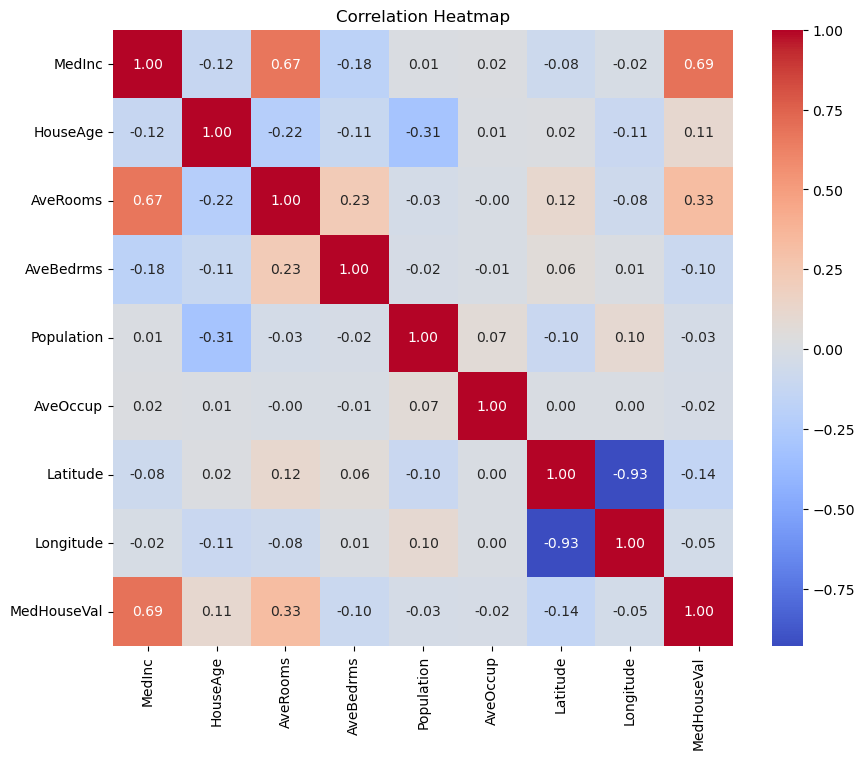

In [13]:
def plot_correlation_heatmap(X, y):
    data_combined = X.copy()
    data_combined["MedHouseVal"] = y
    corr = data_combined.corr()
    plt.figure(figsize=(10, 8))
    plt.title("Correlation Heatmap")
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.show()


plot_correlation_heatmap(cleaned_X, cleaned_y)

We can use the following guide for interpreting correlation thresholds: 

- Negligible: $|r| < 0.1$ (often ignored)
- Weak: $0.1 \leq |r| < 0.3$
- Moderate: $0.3 \leq |r| < 0.5$
- Strong: $0.5 \leq |r| < 0.7$
- Very Strong: $|r| \geq 0.7$

For feature selection, prioritize $|r| \geq 0.3$, and focus on $|r| \geq 0.5$ for strong relationships unless domain knowledge dictates otherwise.

> The above is not a strict rule, but a guideline which can be adjusted based on the domain knowledge and the data.

Let's Analyze this heatmap: 

**1. Correlation Between Features and the Target (MedHouseVal)**

- **Strong Correlation**: 
  - **MedInc (Median Income)** has a strong positive correlation with **MedHouseVal** (**0.69**). 
    - This means that as median income increases, house values tend to increase as well.
    - This aligns with the economic principle that wealthier areas typically have higher property values.

- **Moderate Correlations**:
  - **AveRooms (Average Rooms per Dwelling)** has a moderate positive correlation (**0.33**) with **MedHouseVal**.
    - More rooms per house might indicate larger or more luxurious properties, which could drive up house prices.

- **Weak Correlations**:
  - **HouseAge (Age of Houses)** shows a weak positive correlation (**0.11**) with **MedHouseVal**.
    - This suggests that older houses might be slightly more valuable in the dataset's context, but the relationship isn't strong.
  - **Latitude** shows a slightly negative correlation (**-0.14**) with **MedHouseVal**, which may indicate a trend where houses further north in the region are slightly less expensive. 
  - **AveBedrms (-0.10)**
- **Negligible Correlations**: 
  - **Population (-0.03)**, **AveOccup (-0.02)**, and **Longitude (-0.05)** show very weak correlations with **MedHouseVal**. These features do not have significant predictive power for house prices on their own.


**2. Multicollinearity Insights**

- **Longitude and Latitude (-0.93)**:
  - This is a strong negative correlation. However, neither **Longitude** nor **Latitude** has a strong individual correlation with the target variable (**MedHouseVal**). Although since our dataset is based on California housing, and California state is spread vertically more than horizontally, Latitude (which is a horizontal lines) has a stronger correlation with the target than Longitude. This suggest that in our dataset the influence of location of the house between south and north of the state is more important than the influence of the location between east and west of the state.

  - There are multiple options to handle this:
    - **Feature Selection**: Keep only one of the features. (e.g., **Latitude** which has a larger correlation with the target).
    - **New Feature Using PCA**: Use [Principal Component Analysis (PCA)](../feature_engineering.md#pca-principal-component-analysis) to reduce the dimensionality of the dataset. This will create new features that are linear combinations of the original features, which can help reduce multicollinearity.
    - **New Feature by Calculating Distance**: Create a new feature that combines both features (e.g., distance to a specific location). 

- **AveRooms and AveBedrms (0.23)**:
  - This is a weak positive correlation, meaning these features are loosely related. However, **AveRooms** shows a better relationship with target **MedHouseVal** than **AveBedrms**, so you might prefer to prioritize **AveRooms** in the model.



**Conclusion and Next Steps**

- **Feature Selection**:
    - **MedInc (Median Income)** is clearly the most influential feature for predicting house prices.
    - **AveRooms**, **HouseAge** and **Latitude** might add additional predictive power due to their moderate correlations with the target.
    - Note: there are other techniques for feature selection such as [**Univariate Statistical Tests**](https://scikit-learn.org/1.5/modules/feature_selection.html#univariate-feature-selection), **Recursive Feature Elimination (RFE)**, **Forward Selection**, **Backward Elimination**, etc. In this example, to go through the analysis step by step and for simplicity, we'll manually select the features based on our analysis.

- **Feature Reduction**:
    - Due to the correlation between **AveRooms** and **AveBedrms**, one of these features might be redundant. Since **AveRooms** correlates better with the target, it may be wise to focus on it and drop **AveBedrms**.
    - Features like **Population**, **AveOccup**, **AveBedrms**, and **Longitude** appear to have weaker direct relationships with house prices. So we might consider dropping them to reduce our feature space. 

- **Feature Creation**
    - While neither of geographic features **Latitude** and **Longitude** show strong correlation with house prices individually, their **combined influence** might be significant. For example, a new feature based on the **distance to a central point**, such as the city center or a key landmark. However, we won't create new features in this example.

- **Feature Transformation:** We'll be using normalizaiton technique to scale the features into a similar range.



In [14]:
selected_feature_names = ["MedInc", "HouseAge", "AveRooms", "Latitude"]

Let's use `scikit-learn` built-in **Univariate Feature Selection** method to select the top 4 features and compare that with our manual selection.

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 4 features for regression
selector = SelectKBest(score_func=f_regression, k=4)
selector.fit_transform(X, y)
print("Selected features:", X.columns[selector.get_support()])

Selected features: Index(['MedInc', 'HouseAge', 'AveRooms', 'Latitude'], dtype='object')


So, it seems we are on the right track with our manual selection. 

### Scatter Plot
**Scatter Plot** is a good way to visualize the data. We can show the relationship between two features and a feature with the target variable.

The scatter plot of each feature against the target variable, shows the relationship between that feature and the target variable. This can help us understand the data and how spread out the feature/target values are.


In [16]:
def plot_feature_target_scatter(X, y):
    data_combined = X.copy()
    data_combined["MedHouseVal"] = y
    sns.pairplot(
        data_combined,
        y_vars="MedHouseVal",
        x_vars=X.columns,
        height=5,
        aspect=0.7,
        kind="scatter",
    )


Let's look at the scatter plots for the selected features **before** removing the outliers.

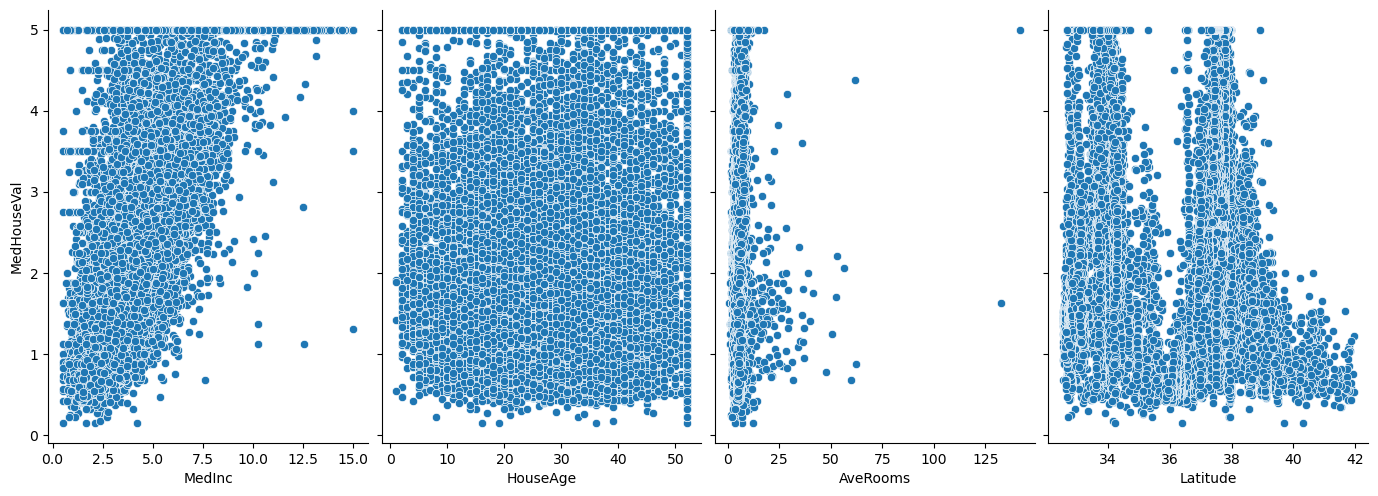

In [17]:
plot_feature_target_scatter(X[selected_feature_names], y)

Looking at the above scatter plot, we can see a `AveRooms` feature has a heavy concentration at very low values without a proper distribution, as it lacks a balanced spread across its range and exhibits sparse, extreme outliers. 

Compare this now with the distribution after removing the outliers. 


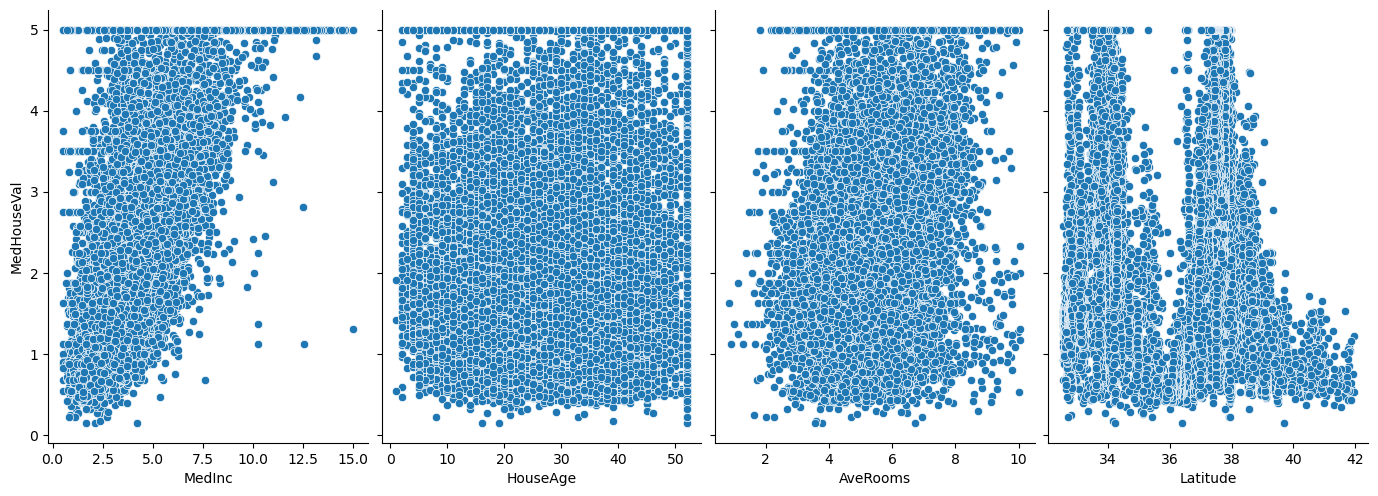

In [18]:
plot_feature_target_scatter(cleaned_X[selected_feature_names], cleaned_y)

The scatter plot looks much better now. The data is more spread out and the outliers are removed. This will help the model to learn better and generalize better on unseen data.

### Scatter Plot Matrix
A scatter plot matrix is a grid of scatter plots that shows the relationship between every pair of features in a dataset. The diagonal of the matrix shows the distribution of a single feature, while the other cells show the relationship between two features (and the target variable).

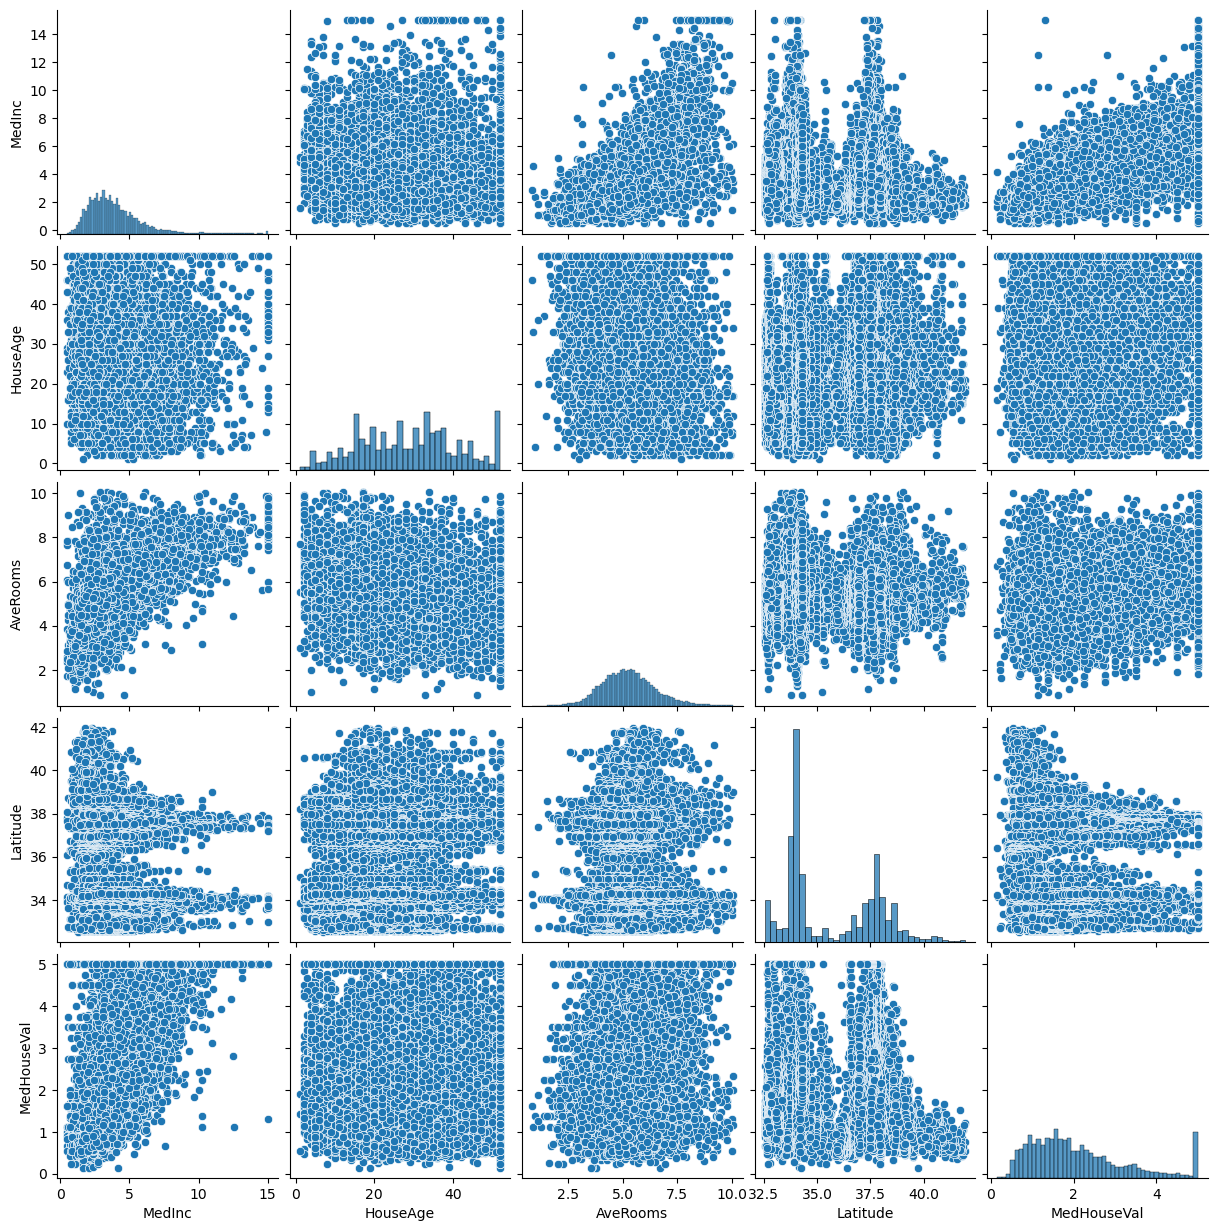

In [19]:
def plot_features_target_scatter_matrix(X, y):
    data_combined = X.copy()
    # Add the target to the data to plot the combined scatter plot
    data_combined["MedHouseVal"] = y
    sns.pairplot(data_combined)


plot_features_target_scatter_matrix(
    cleaned_X[selected_feature_names], cleaned_y
)

**Insights and the next steps:**
- The above pairplot shows the scatter plot of each feature against the target variable. The diagonal plots are **histograms** of the features. Histograms show the distribution of a feature across its range. For example, the `AveRooms` shows the higher number of houses with around 5 rooms. 


- The plot shows a good spread of data points among the features, and the relationship between the features and the target variable. It also shows a good spread of feature values across their range (in the Histograms). This is a good indication that the selected features are good candidates for the model without significant outliers and imbalances of scale. Although we can see that features still have different scales. For example, `HouseAge` ranges from 1 to 52, while `AveRooms` ranges from 0.84 to 10. This can cause issues in the model training process, as the model might give more weight (importance) to the features with higher values. So, at the end, we'll [normalize](../feature_engineering.md#scaling-and-normalization) the features to have a similar scale before training the model.


In this example, we used `seaborn` library. `seaborn` is built on top of `matplotlib` and provides a high-level interface for creating attractive and informative statistical graphics. However, we can achive the same by using `matplotlib` library directly.

Let's see the scatter plot of `MedInc` and `HouseAge` features against the target variable `MedHouseVal` using `Matplotlib` library.

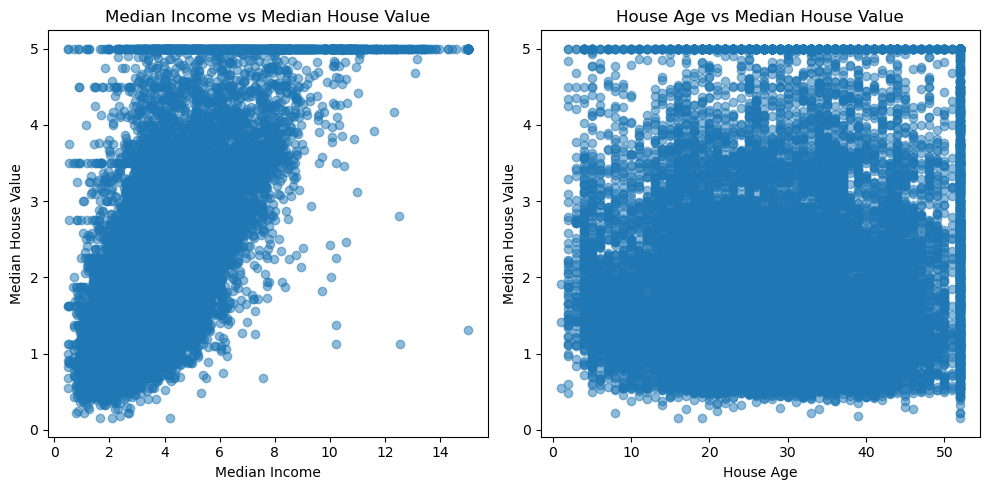

In [20]:
def plot_feature_target_matplotlib(X, y):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X["MedInc"], y, alpha=0.5)
    plt.title("Median Income vs Median House Value")
    plt.xlabel("Median Income")
    plt.ylabel("Median House Value")

    # Scatter plot for 'HouseAge' vs 'MedHouseVal'
    plt.subplot(1, 2, 2)
    plt.scatter(X["HouseAge"], y, alpha=0.5)
    plt.title("House Age vs Median House Value")
    plt.xlabel("House Age")
    plt.ylabel("Median House Value")

    plt.tight_layout()
    plt.show()


plot_feature_target_matplotlib(cleaned_X, cleaned_y)

### Feature Scaling
When we are happy with the selection of our features and added any new features (if any), it's the time to to [normalize](../feature_engineering.md#scaling-and-normalization) the values of these features to have a similar scale. We'll use `StandardScaler` from `sklearn.preprocessing` module to normalize the features. `StandardScaler` uses the [z-score](../feature_engineering.md#z-score-normalization) normalization method to normalize the features.

This is the current state of our data with each feature in different ranges of values.

In [21]:
# Range of selected features
print(cleaned_X[selected_feature_names].describe())

             MedInc      HouseAge      AveRooms      Latitude
count  20419.000000  20419.000000  20419.000000  20419.000000
mean       3.867655     28.752241      5.276278     35.619192
std        1.892258     12.565225      1.229901      2.129161
min        0.499900      1.000000      0.846154     32.540000
25%        2.562500     18.000000      4.432572     33.930000
50%        3.534100     29.000000      5.213775     34.250000
75%        4.742850     37.000000      6.016435     37.710000
max       15.000100     52.000000     10.053140     41.950000


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_X = pd.DataFrame(
    scaler.fit_transform(cleaned_X[selected_feature_names]),
    columns=selected_feature_names,
)

**Should we scale both X and y?**

Typically we normalize `y` in **regression problems** (where the target variable is continuous) or with scale-sensitive models such as Neural Networks.
However, we don't normalize `y` in **classification problems** (where the target variable is categorical) or dealing with scale-insensitive models such as Decision Trees, Random Forests, or Gradient Boosting models.

So, since here we are dealing with a regression problem, we'll normalize the target variable `y` as well.



In [23]:
y.shape

(20640,)

We need to change the shape of `y` from `(m,)` to `(m, 1)` to be able to use `StandardScaler` on it. In other words, we need to convert `y` from a vector to a matrix with one column and as many rows as needed to accommodate all the data. `reshape(-1, 1)` will change the shape of this array to have as many rows as needed and one column.


In [24]:
normalized_y = scaler.fit_transform(cleaned_y.values.reshape(-1, 1))

In [25]:
print(normalized_X.describe())

             MedInc      HouseAge      AveRooms      Latitude
count  2.041900e+04  2.041900e+04  2.041900e+04  2.041900e+04
mean  -5.567699e-18  5.567699e-17 -7.238008e-17  1.714851e-15
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00
min   -1.779798e+00 -2.208709e+00 -3.602106e+00 -1.446235e+00
25%   -6.897508e-01 -8.557351e-01 -6.860125e-01 -7.933796e-01
50%   -1.762776e-01  1.971835e-02 -5.082147e-02 -6.430820e-01
75%    4.625250e-01  6.564117e-01  6.018163e-01  9.820107e-01
max    5.883297e+00  1.850212e+00  3.884036e+00  2.973454e+00


## Modeling
We are now ready to train our model. We'll use [**Gradient Descent**](../linear_regression.md#gradient-descent) to train a linear regression model.

In the following steps we'll:

- Divide the dataset into training and testing sets.
- Use [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor) which is an implementation of [Stochastic Gradient Descent](../gradient_descent.md#stochastic-gradient-descent-sgd) algorithm.
- Evaluate the model using the test set.

### Train-Test Split

We'll use 20% of the data for testing and 80% for training.

In [26]:
from sklearn.model_selection import train_test_split

# 20% test data, 80% training data
test_size = 0.2
# Set a seed for reproducibility
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    normalized_X, normalized_y, test_size=test_size, random_state=random_state
)

`random_state` is used to ensure that the split is the same each time we run the code. This is useful for reproducibility and debugging purposes.

In [27]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (16335, 4), y_train shape: (16335, 1)
X_test shape: (4084, 4), y_test shape: (4084, 1)


### Train the Model
We'll train the model with 1000 epochs (iterations) and a learning rate of 0.001. 

In [28]:
from sklearn.linear_model import SGDRegressor

epochs = 1000
learning_rate = 0.01

sgd_regressor = SGDRegressor(max_iter=epochs, alpha=learning_rate)

In [29]:
sgd_regressor.fit(X_train, y_train.ravel())

SGDRegressor(alpha=0.01)

`ravel()` function is used to convert the target variable `y` from a column-vector to a 1d array which is expected by the SGDRegressor. 


#### Model Parameters

In [30]:
print("w (weights):", sgd_regressor.coef_)
print("b (bias):", sgd_regressor.intercept_)

w (weights): [ 0.83291729  0.16466573 -0.16582053 -0.05871305]
b (bias): [0.00356421]


#### Iterations and Parameter Updates

In [31]:
print(f"Number of iterations completed: {sgd_regressor.n_iter_}")
print(f"Number of weight updates: {sgd_regressor.t_}")
print("Stopping criteria (tolerance): tol =", sgd_regressor.tol)
print("n_iter_no_change =", sgd_regressor.n_iter_no_change)

Number of iterations completed: 7
Number of weight updates: 114346.0
Stopping criteria (tolerance): tol = 0.001
n_iter_no_change = 5


**The number of iterations completed is less than the number of max iterations:**

The default values in SGDRegressor:
```
max_iter=1000
tol=0.001
n_iter_no_change=5
```

This means that the training will stop if the improvement in the loss function is smaller than `0.001` for `5` consecutive epochs, or after `1000` epochs, whichever comes first.



**Parameter Updates:**

The number of weight updates is when the model update the parameters (after the backpropagation step) to minimize the loss function.

Parameter updates mean how many times the model updates all the weights and bias values in the model. For example, here we have 4 features which means we have 4 weights and 1 bias term. So, these 5 parameters are updated 114346 times in this example.


`SGDRegressor` uses as standard SGD definition which uses random samples (batch size of 1), then run the forward pass and backpropagation step, and update the parameters accordingly. More on this here: [Gradient Descent](../gradient_descent.md#

$$\text{number of weight updates} = m \times \text{number of iterations}$$

where:
- $m$ is the number of samples in the training set.

So, here we have:
- `m = 16335` (80% of the data)
- `n_iter = 7` (number of iterations)

So, the number of weight updates is:
 $$16335 * 7 = 114345 + 1 = 114346$$
where:
- $16335$ is the number of samples in the training set.
- $7$ is the number of iterations.
- $+1$ is for the initial weight update before the first iteration. 

However, in modern machine learning libraries, we typically use
 [_mini-batch SGD_](../gradient_descent.md#mini-batch-sgd) which can be more efficient than the standard SGD. In mini-batch SGD, we update the weights after a batch of samples, not after each sample.  

$$\text{number of weight updates} = \frac{m}{batch\_size} \times \text{number of iterations}$$

where:
In here, with $batch\_size = 1$, we have the same number of weight updates as the number of iterations.




**epochs vs iterations:**

Epochs is the number of times the model sees the entire dataset. In other words, one epoch is a complete pass (forward and backward pass, and parameter update) of the entire training dataset. Whereas each iteration is the number of updates the model makes to the parameters during the training process.

However, in some cases **iterations** and **epochs** terms are used interchangeably, like here in `SGDRegressor` where `n_iter` is used to refer to as the number of epochs.

Further reading here: [Stochastic Gradient Descent](../gradient_descent.md#stochastic-gradient-descent-sgd)

### Evaluate the Model (Make Predictions)

In [32]:
y_test_pred = sgd_regressor.predict(X_test)

`y_test_pred` is the predicted target values $\hat y$ for the input values of `X_test`. 

In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error for the test set: {mse}")

Mean Squared Error for the test set: 0.4921151863892668


In [34]:
def plot_actual_vs_predicted_by_features(results_df, feature_names):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

    for i, feature in enumerate(feature_names):
        sns.scatterplot(
            x=feature,
            y="Actual",
            data=results_df,
            ax=axes[i],
            color="blue",
            label="Actual",
        )
        sns.scatterplot(
            x=feature,
            y="Predicted",
            data=results_df,
            ax=axes[i],
            color="red",
            label="Predicted",
        )
        axes[i].set_title(f"{feature} vs Price")
        axes[i].set_xlabel(feature)
        if i == 0:
            axes[i].set_ylabel("Price")
        else:
            axes[i].set_ylabel("")

    plt.tight_layout()
    plt.show()

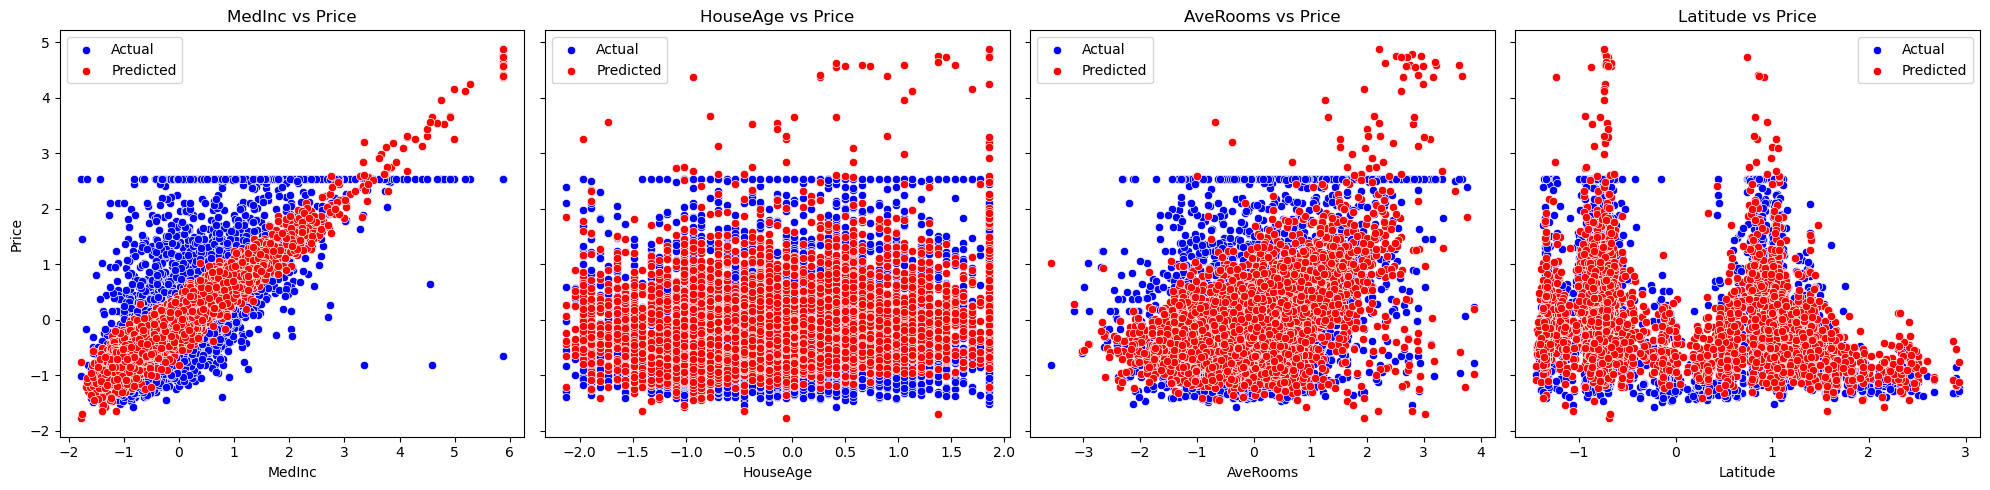

In [35]:
results_df = pd.DataFrame(X_test, columns=selected_feature_names)
results_df["Actual"] = y_test.ravel()
results_df["Predicted"] = y_test_pred

plot_actual_vs_predicted_by_features(results_df, selected_feature_names)

As seen in the above plot, the model seems to be doing OK in predicting the house price based on all features except `MedInc`. Some of the possible reasons for this could be:

1. **Nonlinear Relationship with MedInc**: House prices may have a nonlinear relationship with `MedInc`, but the linear `SGDRegressor` struggles to capture it. Adding polynomial terms or use a nonlinear model like neural networks might help.

2. **High Influence of MedInc**: `MedInc` is the most significant feature (highest correlation with the target), magnifying errors in predictions compared to other features. For example, instead of assuming that `MedInc` and `Latitude` influence house prices independently, their interaction term `(MedInc * Latitude)` allows the model to capture how their combination affects house prices.

3. Outliers in MedInc**: Outliers in `MedInc` could distort the predictions, leading to poor fits for extreme values. Removing or transforming outliers and use robust normalization methods could help.



> Note: even though the dataset was normalized before training the model, and predictions are also in the normalized scale, The `SGDRegressor` predicts values based on the learned weights, and it is not inherently bounded by the range of the target variable. Therefore, even if the actual values are capped during normalization, the model can predict outside of this range, especially if it learns to fit patterns influenced by outliers or extrapolation.
>
> This is why you see the predicted values outside of the range of the actual values. 